In [13]:
from pkdtools import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mpl_toolkits.mplot3d import Axes3D  # not always necessary but good for older versions
import imageio
import os
import seaborn as sns
import pandas as pd


G = 6.67430e-11  # m^3 kg^-1 s^-2
M_center = 1.5e17  # kg
yr = 3.15576e7  # seconds
au = 1.496e11  # m
rho = 1e3
tau = 0.15   # optical depth
r = 0.75    # 0.25 - 0.75

R_roche = 1.05 * (M_center/rho)**(1/3)

Sigma = 4 * rho * r * tau / 3
orbit_radius = 1e5  # m
orbit_speed = np.sqrt(G * M_center / orbit_radius)
omega_orb = np.sqrt(G * M_center / (orbit_radius)**3)
period_orb = 2 * np.pi / omega_orb
escape_speed = np.sqrt(2 * G * 4/3 * rho * r**3 / r)
unit_speed = omega_orb * r


lambda_crit = 4 * np.pi**2 * G * Sigma / omega_orb**2
Lx = 4 * lambda_crit
Ly = 4 * lambda_crit
Lz = 10 * r

theoretical_collision_speed = Lz / orbit_radius * orbit_speed

print('Oribit Period (h): ', period_orb/3600)
print('timestep (h): ', 1e-07 * yr/2/np.pi/3600)
print('orbital radius: ', orbit_radius/ R_roche)
print('orbital speed (m/s): ', orbit_speed)
print('lambda crit (m): ', lambda_crit)
print('Surface density (kg/m^2): ', Sigma)
print('Scale height: ', Lz / orbit_radius)
print('Escape speed (m/s): ', escape_speed)
print('Unit speed (m/s): ', unit_speed)
print('Theoretical collision speed (m/s): ', theoretical_collision_speed)

Oribit Period (h):  17.443309082435025
timestep (h):  0.00013951522311435544
orbital radius:  1.7924495788210075
orbital speed (m/s):  10.00572336215628
lambda crit (m):  39.47841760435744
Surface density (kg/m^2):  150.0
Scale height:  7.5e-05
Escape speed (m/s):  0.00031640875461971655
Unit speed (m/s):  7.50429252161721e-05
Theoretical collision speed (m/s):  0.0007504292521617209


In [14]:
Ly / 7e-3 /3600,  Ly , escape_speed/unit_speed

(6.266415492755149, 157.91367041742976, 4.216370213557839)

In [15]:
0.00000067 * au, orbit_radius

(100232.0, 100000.0)

In [16]:
# examine the code

volume = Lx * Ly * Lz 
N_total = 2837
sigma = np.pi * r**2
optical_depth = N_total * sigma / volume * Lz

print('Theoretical optical depth: ~', optical_depth)
print('Input optical depth: ', tau)

Theoretical optical depth: ~ 0.2010445382526568
Input optical depth:  0.15


In [17]:
Particles = ss_in('ss.0000010000', units = 'pkd')

In [19]:
p_position = np.zeros((len(Particles), 3))

for i in range(len(Particles)):
    p_position[i] = np.array([Particles[i].x, Particles[i].y, Particles[i].z])

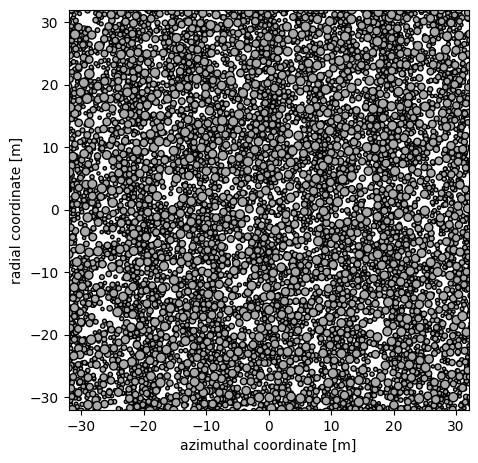

In [51]:
# plot the particles

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_particles(filename):
    Particles = ss_in(filename, units = 'mks')
    p_position = np.zeros((len(Particles), 3))
    p_radius = np.zeros(len(Particles))


    for i in range(len(Particles)):
        p_position[i] = np.array([Particles[i].x, Particles[i].y, Particles[i].z])
        p_radius[i] = Particles[i].R


    plt.figure(figsize=[5, 5])
    ax = plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(-32, 32), ylim=(-32, 32))

    points_whole_ax = 5 * 0.8 * 72    # 1 point = dpi / 72 pixels
    plot_range = 64  # x_max - x_min
    # points_radius = 2 * radius / range * points_whole_ax

    # ax = plt.subplot(111,aspect='equal')
    ax.set_ylabel("radial coordinate [m]")
    ax.set_xlabel("azimuthal coordinate [m]")

    ax.scatter(p_position[:, 0], p_position[:, 1], s = (2 * p_radius / plot_range * points_whole_ax)**2,facecolor='darkgray', edgecolor='black')
    # ax.set_ylim(np.min(p_position[:, 1]),np.max(p_position[:,1]))
    # ax.set_xlim(np.min(p_position[:, 0]), np.max(p_position[:, 0]))

    # for i, p in enumerate(Particles):
    #     circ = patches.Circle((p.y, p.x), p.R, facecolor='darkgray', edgecolor='black')
    #     ax.add_patch(circ)


    # fig = plt.figure()
    # # ax = fig.add_subplot(111, projection='3d')

    # # ax.scatter(
    # #     p_position[:, 0],
    # #     p_position[:, 1],
    # #     p_position[:, 2],
    # #     s=(p_radius*100)**2,  # scale factor here (adjust 100 as needed)
    # #     alpha=0.6
    # # )


    # ax = fig.add_subplot(111)
    # ax.scatter(p_position[:, 0], p_position[:, 1], s=p_radius, alpha=0.6)
    
    plt.show()


plot_particles('results/tau_2_R_3/ss.0000110000')



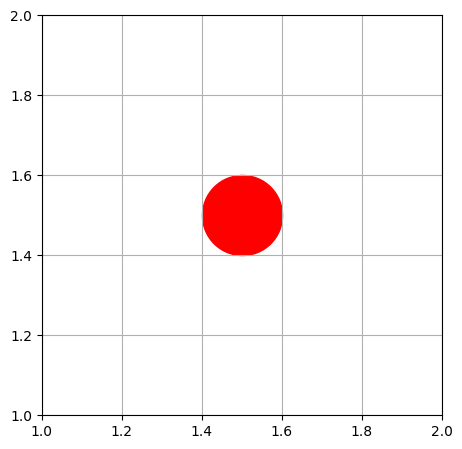

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5, 5])
ax = plt.axes([0.1, 0.1, 0.8, 0.8], xlim=(1, 2), ylim=(1, 2))
points_whole_ax = 5 * 0.8 * 72    # 1 point = dpi / 72 pixels
radius = 0.1

range = 1  # x_max - x_min
points_radius = 2 * radius / range * points_whole_ax
ax.scatter(1.5, 1.5, s=points_radius**2, color='r')
plt.grid()
plt.show()

In [24]:


def plot_position_gif(filenames, output_path='gif/particles_2d.gif'):
    images = []

    for idx, filename in enumerate(filenames):
        print(f"Processing frame {idx} of {len(filenames)}")
        Particles = ss_in(filename, units='pkd')
        p_position = np.zeros((len(Particles), 3))
        p_radius = np.zeros(len(Particles))
        for i in range(len(Particles)):
            p_position[i] = np.array([Particles[i].x, Particles[i].y, Particles[i].z])
            p_radius = Particles[i].R

        fig = plt.figure()
        # ax = fig.add_subplot(111, projection='3d')
        # ax.scatter(p_position[:, 0], p_position[:, 1], p_position[:, 2], s=(p_radius * 100)**2, alpha=0.6)

        ax = fig.add_subplot(111)
        ax.scatter(p_position[:, 0], p_position[:, 1], s=(p_radius * 100)**2, alpha=0.6)

        # ax.set_xlim([-4, 4])
        # ax.set_ylim([-4, 4])
        # ax.set_zlim([-4, 4])
        ax.set_title(f'Frame {idx}')

        # Save the frame to a temporary image
        temp_filename = f'_frame_{idx}.png'
        plt.savefig(temp_filename, dpi=100)
        plt.close(fig)

        images.append(imageio.imread(temp_filename))

    # Save the images as a GIF
    imageio.mimsave(output_path, images)

    # Clean up temp files
    for idx in range(len(filenames)):
        os.remove(f'_frame_{idx}.png')

    print(f"GIF saved to {output_path}")



start_index = 0
end_index = 5000000
filenames = ['ss.' + str(i).zfill(10) +'.r' for i in range(start_index, end_index, 10000)]

print(filenames)

plot_position_gif(filenames)

['ss.0000000000.r', 'ss.0000010000.r', 'ss.0000020000.r', 'ss.0000030000.r', 'ss.0000040000.r', 'ss.0000050000.r', 'ss.0000060000.r', 'ss.0000070000.r', 'ss.0000080000.r', 'ss.0000090000.r', 'ss.0000100000.r', 'ss.0000110000.r', 'ss.0000120000.r', 'ss.0000130000.r', 'ss.0000140000.r', 'ss.0000150000.r', 'ss.0000160000.r', 'ss.0000170000.r', 'ss.0000180000.r', 'ss.0000190000.r', 'ss.0000200000.r', 'ss.0000210000.r', 'ss.0000220000.r', 'ss.0000230000.r', 'ss.0000240000.r', 'ss.0000250000.r', 'ss.0000260000.r', 'ss.0000270000.r', 'ss.0000280000.r', 'ss.0000290000.r', 'ss.0000300000.r', 'ss.0000310000.r', 'ss.0000320000.r', 'ss.0000330000.r', 'ss.0000340000.r', 'ss.0000350000.r', 'ss.0000360000.r', 'ss.0000370000.r', 'ss.0000380000.r', 'ss.0000390000.r', 'ss.0000400000.r', 'ss.0000410000.r', 'ss.0000420000.r', 'ss.0000430000.r', 'ss.0000440000.r', 'ss.0000450000.r', 'ss.0000460000.r', 'ss.0000470000.r', 'ss.0000480000.r', 'ss.0000490000.r', 'ss.0000500000.r', 'ss.0000510000.r', 'ss.0000520

/var/folders/yx/n0ldhkpn0hq62r679b3mq7tm0000gn/T/ipykernel_10007/3790867496.py:30: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(temp_filename))


Processing frame 3 of 500
Processing frame 4 of 500
Processing frame 5 of 500
Processing frame 6 of 500
Processing frame 7 of 500
Processing frame 8 of 500
Processing frame 9 of 500
Processing frame 10 of 500
Processing frame 11 of 500
Processing frame 12 of 500
Processing frame 13 of 500
Processing frame 14 of 500
Processing frame 15 of 500
Processing frame 16 of 500
Processing frame 17 of 500
Processing frame 18 of 500
Processing frame 19 of 500
Processing frame 20 of 500
Processing frame 21 of 500
Processing frame 22 of 500
Processing frame 23 of 500
Processing frame 24 of 500
Processing frame 25 of 500
Processing frame 26 of 500
Processing frame 27 of 500
Processing frame 28 of 500
Processing frame 29 of 500
Processing frame 30 of 500
Processing frame 31 of 500
Processing frame 32 of 500
Processing frame 33 of 500
Processing frame 34 of 500
Processing frame 35 of 500
Processing frame 36 of 500
Processing frame 37 of 500
Processing frame 38 of 500
Processing frame 39 of 500
Processi

In [ ]:
particles = ss_in('ss.0000050000', units = 'pkd')
p_spin = np.zeros((len(particles), 3))
for i in range(len(particles)):
    p_spin[i] = np.array([particles[i].wx, particles[i].wy, particles[i].wz])

fig = plt.figure()
plt.hist(p_spin[:, 0], alpha = 0.3, bins=30)
plt.hist(p_spin[:, 1], alpha = 0.3, bins=30)
plt.hist(p_spin[:, 2], alpha = 0.3, bins=30)

In [4]:


# plot gif of spins
def plot_spin_gif(filenames, plot = 'spin rate', output_path='gif/spin.gif'):
    images = []

    for idx, filename in enumerate(filenames):
        print(f"Processing frame {idx} of {len(filenames)}")
        Particles = ss_in(filename, units='mks')
        p_spin = np.zeros((len(Particles), 3))
        p_spin_rate = np.zeros(len(Particles))
        obliquity = np.zeros(len(Particles))
        for i in range(len(Particles)):
            p_spin[i] = np.array([Particles[i].wx, Particles[i].wy, Particles[i].wz + omega_orb ])
            p_spin_rate[i] = np.linalg.norm(p_spin[i])
            obliquity[i] = np.arccos(p_spin[i, 2] / np.linalg.norm(p_spin[i])) * 180/np.pi

        
        
        if plot == 'spin rate':
            fig = plt.figure()
            plt.title(f'Frame {idx}')
            plt.hist(p_spin_rate/omega_orb, bins=30)
            plt.xlabel('Spin Rate')
            plt.ylabel('Count')

        elif plot == 'obliquity':
            fig = plt.figure()
            plt.title(f'Frame {idx}')
            plt.hist(obliquity, bins=30)
            plt.xlabel('Obliquity')
            plt.ylabel('Count')

        elif plot == 'distribution':
                # Create the figure
            fig = plt.figure(figsize=(8, 8))
            gs = gridspec.GridSpec(4, 4)

            # Main scatter plot
            ax_main = fig.add_subplot(gs[1:4, 0:3])
            ax_main.scatter(obliquity, p_spin_rate/omega_orb,  alpha=0.5)
            ax_main.set_xlim([0, 180])
            ax_main.set_ylim([0, 10])
            ax_main.set_xlabel('Obliquity')
            ax_main.set_ylabel('Spin Rate')
            ax_main.set_title(f'Frame {idx}')

            # Histogram on the top
            ax_top = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
            ax_top.hist(obliquity, bins=50, alpha=0.6)
            ax_top.axis('off')  # Optional: hide axes if you want a cleaner look

            # Histogram on the right
            ax_right = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
            ax_right.hist(p_spin_rate/omega_orb, bins=50, orientation='horizontal', alpha=0.6)
            ax_right.axis('off')  # Optional

            plt.tight_layout()

            

        # Save the frame to a temporary image
        temp_filename = f'_frame_{idx}.png'
        plt.savefig(temp_filename, dpi=100)
        plt.close(fig)

        images.append(imageio.imread(temp_filename))
        os.remove(f'_frame_{idx}.png')

    # Save the images as a GIF
    imageio.mimsave(output_path, images)

    # Clean up temp files
    # for idx in range(len(filenames)):
    #     os.remove(f'_frame_{idx}.png')

    print(f"GIF saved to {output_path}")

start_index = 10000
end_index = 1000000
filenames = ['ss.' + str(i).zfill(10) for i in range(start_index, end_index, 10000)]

print(filenames)


plot_spin_gif(filenames, plot = 'distribution')

['ss.0000010000', 'ss.0000020000', 'ss.0000030000', 'ss.0000040000', 'ss.0000050000', 'ss.0000060000', 'ss.0000070000', 'ss.0000080000', 'ss.0000090000', 'ss.0000100000', 'ss.0000110000', 'ss.0000120000', 'ss.0000130000', 'ss.0000140000', 'ss.0000150000', 'ss.0000160000', 'ss.0000170000', 'ss.0000180000', 'ss.0000190000', 'ss.0000200000', 'ss.0000210000', 'ss.0000220000', 'ss.0000230000', 'ss.0000240000', 'ss.0000250000', 'ss.0000260000', 'ss.0000270000', 'ss.0000280000', 'ss.0000290000', 'ss.0000300000', 'ss.0000310000', 'ss.0000320000', 'ss.0000330000', 'ss.0000340000', 'ss.0000350000', 'ss.0000360000', 'ss.0000370000', 'ss.0000380000', 'ss.0000390000', 'ss.0000400000', 'ss.0000410000', 'ss.0000420000', 'ss.0000430000', 'ss.0000440000', 'ss.0000450000', 'ss.0000460000', 'ss.0000470000', 'ss.0000480000', 'ss.0000490000', 'ss.0000500000', 'ss.0000510000', 'ss.0000520000', 'ss.0000530000', 'ss.0000540000', 'ss.0000550000', 'ss.0000560000', 'ss.0000570000', 'ss.0000580000', 'ss.000059000

/var/folders/yx/n0ldhkpn0hq62r679b3mq7tm0000gn/T/ipykernel_10007/4256636758.py:14: RuntimeWarning: invalid value encountered in scalar divide
  obliquity[i] = np.arccos(p_spin[i, 2] / np.linalg.norm(p_spin[i])) * 180/np.pi
/var/folders/yx/n0ldhkpn0hq62r679b3mq7tm0000gn/T/ipykernel_10007/4256636758.py:65: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(temp_filename))


Processing frame 1 of 99
Processing frame 2 of 99
Processing frame 3 of 99
Processing frame 4 of 99
Processing frame 5 of 99
Processing frame 6 of 99
Processing frame 7 of 99
Processing frame 8 of 99
Processing frame 9 of 99
Processing frame 10 of 99
Processing frame 11 of 99
Processing frame 12 of 99
Processing frame 13 of 99
Processing frame 14 of 99
Processing frame 15 of 99
Processing frame 16 of 99
Processing frame 17 of 99
Processing frame 18 of 99
Processing frame 19 of 99
Processing frame 20 of 99
Processing frame 21 of 99
Processing frame 22 of 99
Processing frame 23 of 99
Processing frame 24 of 99
Processing frame 25 of 99
Processing frame 26 of 99
Processing frame 27 of 99
Processing frame 28 of 99
Processing frame 29 of 99
Processing frame 30 of 99
Processing frame 31 of 99
Processing frame 32 of 99
Processing frame 33 of 99
Processing frame 34 of 99
Processing frame 35 of 99
Processing frame 36 of 99
Processing frame 37 of 99
Processing frame 38 of 99
Processing frame 39 o

In [82]:
p = ss_in('ss.0000500000', units='mks')


obliquity = np.zeros(len(p))
spin_rate = np.zeros(len(p))

for i in range(len(p)):
    wx = p[i].wx
    wy = p[i].wy
    wz = p[i].wz
    w = np.array([wx, wy, wz])
    spin_rate[i] = np.linalg.norm(w)  # magnitude of the spin vector
    if spin_rate[i] == 0:
        obliquity[i] = np.nan
    else:
        obliquity[i] = np.arccos(w[2] / np.linalg.norm(w))  # angle with respect to z-axis

# plt.hist(np.cos(obliquity), bins=30, alpha=0.5)
# plt.hist(spin_rate, bins=30, alpha=0.5)
print(obliquity)

[2.95896247 2.84959988 2.39409474 ... 0.61572931 2.98792573 2.83642719]


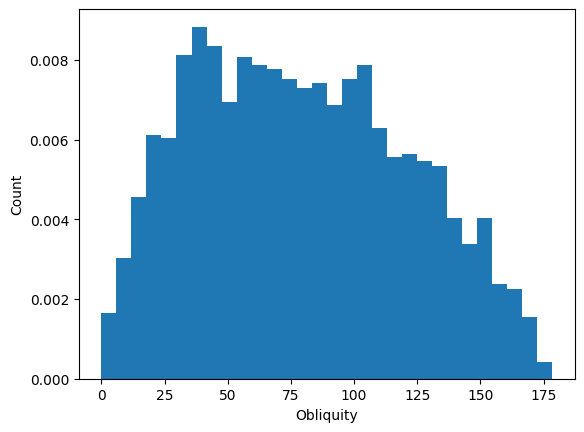

In [16]:
# plot a Maxwellian distribution of the spin rate
def maxwellian(v, v0):
    return (v**2 / (v0**3 * np.sqrt(np.pi/2))) * np.exp(-v**2 / (2 * v0**2))

def rayleigh(x, sigma):
    return (x / sigma**2) * np.exp(-x**2 / (2 * sigma**2))

def plot_maxwellian(v0, max_val, bins=30):
    v = np.linspace(0, max_val, 1000)
    y = maxwellian(v, v0)

    fig, ax = plt.subplots()
    ax.plot(v, y)
    ax.set_xlabel('Spin Rate')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Maxwellian Distribution with v0={v0}')
    plt.vlines(np.sqrt(2), 0, 0.5, color='r', linestyle='--', label='v0')

    plt.show()


def plot_spin(filename, plot = 'spin rate'):
    Particles = ss_in(filename, units='mks')
    p_spin = np.zeros((len(Particles), 3))
    p_spin_rate = np.zeros(len(Particles))
    obliquity = np.zeros(len(Particles))
    for i in range(len(Particles)):
        p_spin[i] = np.array([Particles[i].wx, Particles[i].wy, Particles[i].wz + omega_orb])
        p_spin_rate[i] = np.linalg.norm(p_spin[i])
        obliquity[i] = np.arccos(p_spin[i, 2] / np.linalg.norm(p_spin[i])) * 180/np.pi

    
    if plot == 'spin rate':
        fig, ax = plt.subplots()
        ax.hist(p_spin_rate/omega_orb, bins=30, density=True)
        ax.set_xlabel('Spin Rate')
        ax.set_ylabel('Count')

        # plot maxwellian distribution
        v0 = np.sqrt(2)
        # v0 = np.mean(p_spin_rate/omega_orb)/np.sqrt(2)
        v = np.linspace(0, 10, 1000)
        y = rayleigh(v, v0)
        # ax_maxwell = fig.add_subplot(gs[0, 3])
        ax.plot(v, y)
        ax.set_xlabel('Spin Rate')
        ax.set_ylabel('Probability Density')

    elif plot == 'obliquity':
        fig, ax = plt.subplots()
        ax.hist(obliquity, bins=30, density=True)
        ax.set_xlabel('Obliquity')
        ax.set_ylabel('Count')

    elif plot == 'distribution':
        # Create the figure
        fig = plt.figure(figsize=(8, 8))
        gs = gridspec.GridSpec(4, 4)

        # Main scatter plot
        ax_main = fig.add_subplot(gs[1:4, 0:3])
        ax_main.scatter(obliquity, p_spin_rate/omega_orb, alpha=0.5)
        ax_main.set_xlim([0, 180])
        ax_main.set_ylim([0, 10])
        ax_main.set_xlabel('Spin Rate')
        ax_main.set_ylabel('Obliquity')
        # ax_main.set_title(f'Frame {idx}')

        # Histogram on the top
        ax_top = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
        ax_top.hist(p_spin_rate/omega_orb, bins=50, alpha=0.6)
        ax_top.axis('off')  # Optional: hide axes if you want a cleaner look

        # Histogram on the right
        ax_right = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
        ax_right.hist(obliquity, bins=50, orientation='horizontal', alpha=0.6)
        ax_right.axis('off')  # Optional

        


        plt.tight_layout()


    plt.show()

plot_spin('ss.0000500000', plot = 'obliquity')



# plot_maxwellian(1, 10, bins=30)


In [44]:
(1.5e14)**(1/3) * 0.7816

41528.69688365641

In [50]:
# Rayleigh distribution
def rayleigh(x, sigma):
    return (x / sigma**2) * np.exp(-x**2 / (2 * sigma**2))

def plot_rayleigh(sigma, max_val, bins=30):
    x = np.linspace(0, max_val, 1000)
    y = rayleigh(x, sigma)

    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel('Spin Rate')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Rayleigh Distribution with sigma={sigma}')
    plt.vlines(np.sqrt(2), 0, 0.5, color='r', linestyle='--', label='v0')

    plt.show()